In [1]:
import numpy as np
from pathlib import Path

from models import DCGAN
from torchvision import transforms
import torchvision
import torch
from torch.distributions import Normal

import matplotlib.pyplot as plt

In [2]:
ar1 = lambda x: w*x + np.random.randn()

In [3]:
x = 0
w = 0.99

hist = []
for _ in range(100):
    hist.append(x)
    x = ar1(x)
    
hist = np.array(hist)
hist = (hist - hist.min()) / (hist.max() - hist.min())
hist = hist * 2 - 1

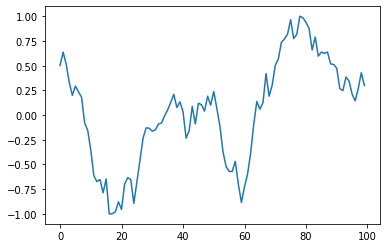

In [4]:
plt.plot(hist)
plt.show()

In [5]:
path = Path().absolute()

In [6]:
# labels = torch.load('labeled_latents/RGB/labels.pt')
# z = torch.load('labeled_latents/RGB/z.pt')

# labels = torch.load('labeled_latents/grayscale/labels.pt')
# z = torch.load('labeled_latents/grayscale/z.pt')

In [58]:
model_path = path / 'wandb' / 'RGB' / 'files' / 'BlobGAN' / '298o8k9c' / 'checkpoints' / 'epoch=1_global_step=9600.ckpt'
# model_path = path / 'wandb' / 'grayscale' / 'files' / 'BlobGAN' / 'trytk8ib' / 'checkpoints' / 'epoch=1_global_step=9800.ckpt'

transform = transforms.ToPILImage()

model = DCGAN.load_from_checkpoint(model_path)
model.eval()
print()

In [68]:
z = model.get_noise(1)

In [69]:
w = torch.ones(z.shape) * 0.99
x = torch.zeros(z.shape)
ar1 = lambda x: w*x + torch.randn(z.shape)

In [70]:
z.shape

torch.Size([1, 100, 1, 1])

In [71]:
hist = []
for _ in range(100):
    hist.append(x)
    x = ar1(x)
    
video = torch.cat(hist)
video_max, _ = torch.max(video, dim=0)
video_min, _ = torch.min(video, dim=0)
video = (video - video_min) / (video_max - video_min)
video = video * 2 - 1

In [72]:
processed_video = model(video)

In [73]:
processed_video.shape

torch.Size([100, 3, 64, 64])

In [74]:
reshaped_video = processed_video.permute(0, 2, 3, 1)

In [75]:
reshaped_video.shape

torch.Size([100, 64, 64, 3])

In [76]:
torchvision.io.write_video('walk.mp4', reshaped_video, fps=15)

In [48]:
im = transform(model(z).squeeze(0))

In [49]:
im.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


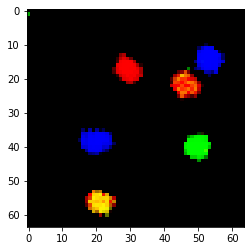

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


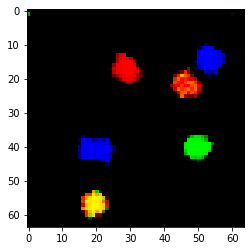

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


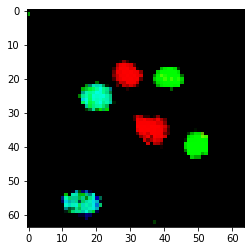

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


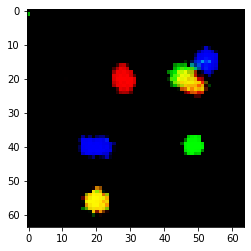

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


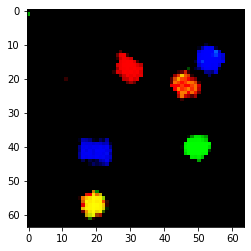

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


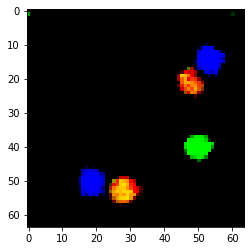

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


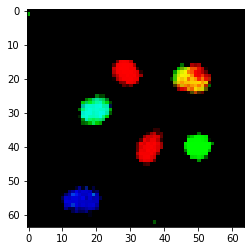

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


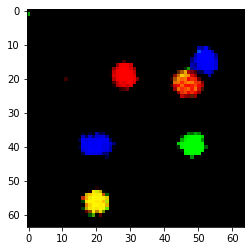

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


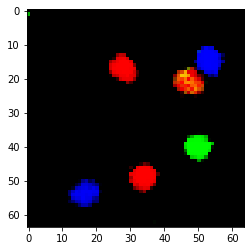

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


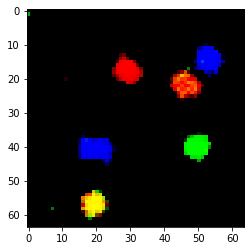

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


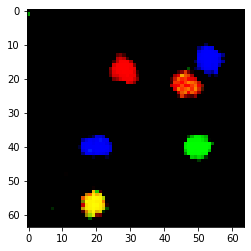

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


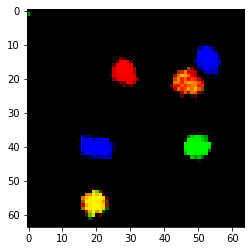

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


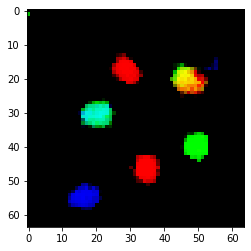

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


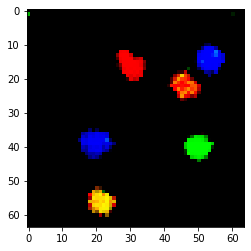

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


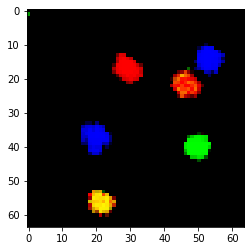

In [5]:
idx = torch.where(labels == 6)
imgs = z[idx]

for i in range(imgs.shape[0]):
    x = imgs[i].unsqueeze(0)
    y = model.G(x).squeeze(0)
    y = y.permute(1, 2, 0).detach().numpy()
    plt.imshow(y)
    plt.show()

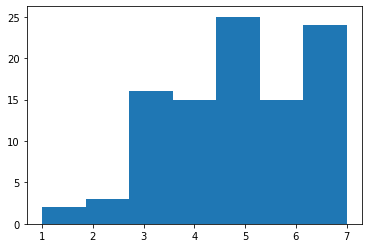

In [6]:
plt.hist(labels.numpy(), bins=labels.max())
plt.show()

In [8]:
a = z[torch.where(labels == 5)].mean(dim=0, keepdim=True)
b = z[torch.where(labels == 2)].mean(dim=0, keepdim=True)

c = a - b
std = 0.5
dist = Normal(c, std)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


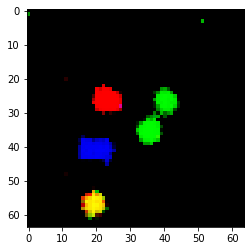

In [27]:
a = z[torch.where(labels == 5)]
b = z[torch.where(labels == 5)]

num_imgs = 5
idx_a = torch.randint(0, a.shape[0], (num_imgs,))
idx_b = torch.randint(0, b.shape[0], (num_imgs,))

a_vect = a[idx_a].mean(dim=0, keepdim=True)
b_vect = b[idx_b].mean(dim=0, keepdim=True)

c = a_vect - b_vect
# std = 0.5
# dist = Normal(c, std)

y = model.G(c).squeeze(0)
y = y.permute(1, 2, 0).detach().numpy()
plt.imshow(y)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


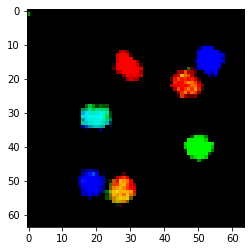

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


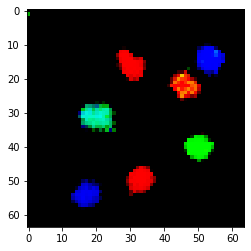

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


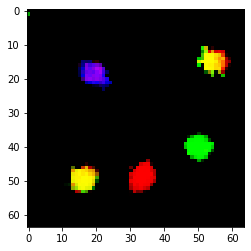

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


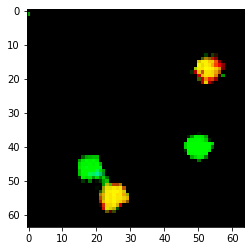

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


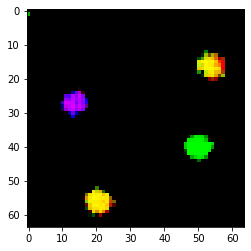

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


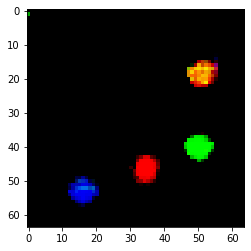

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


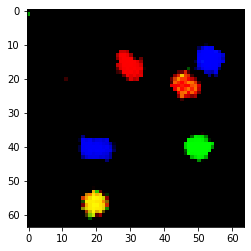

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


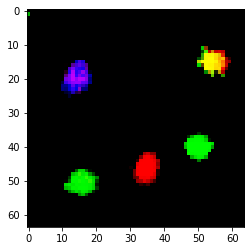

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


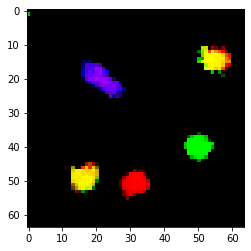

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


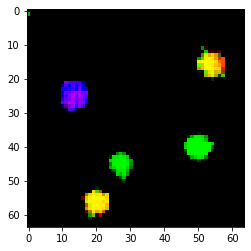

In [16]:
for _ in range(10):
    sample = dist.sample()
    y = model.G(sample).squeeze(0)
    y = y.permute(1, 2, 0).detach().numpy()
    plt.imshow(y)
    plt.show()